In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('/content/top 120 best-selling mobile phones.csv')
df

,Rank,Manufacturer,Model,Form Factor,Smartphone?,Year,Units Sold (million )
0,1,Nokia,1100,Bar,False,2003,250.0
1,2,Nokia,1110,Bar,False,2005,247.5
2,3,Apple,iPhone 6 & 6 Plus,Touchscreen,True,2014,222.4
3,4,Nokia,105 Series,Bar,False,2013,200.0
4,5,Apple,iPhone 6S & 6S Plus,Touchscreen,True,2015,174.1
...,...,...,...,...,...,...,...
115,116,Samsung,Samsung Galaxy A55,Touchscreen,True,2024,2.7
116,117,Samsung,Samsung Galaxy S24,Touchscreen,True,2024,2.4
117,118,Samsung,Samsung Galaxy A15 4G,Touchscreen,True,2023,2.2
118,119,Google,Pixel & Pixel XL,Touchscreen,True,2016,2.1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   120 non-null    int64  
 1   Manufacturer           120 non-null    object 
 2   Model                  120 non-null    object 
 3   Form Factor            120 non-null    object 
 4   Smartphone?            120 non-null    bool   
 5   Year                   120 non-null    int64  
 6   Units Sold (million )  120 non-null    float64
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 5.9+ KB


**Task 1: EDA**

In [33]:
df.isnull().sum().sum()

np.int64(0)

In [34]:
df.duplicated().sum()

np.int64(0)

In [35]:
# Generate summary statistics
print(df.describe())

             Rank         Year  Units Sold (million )
count  120.000000   120.000000             120.000000
mean    60.500000  2012.758333              48.050000
std     34.785054     6.590030              58.044835
min      1.000000  1996.000000               2.000000
25%     30.750000  2007.000000              10.000000
50%     60.500000  2013.000000              22.050000
75%     90.250000  2019.000000              60.000000
max    120.000000  2024.000000             250.000000


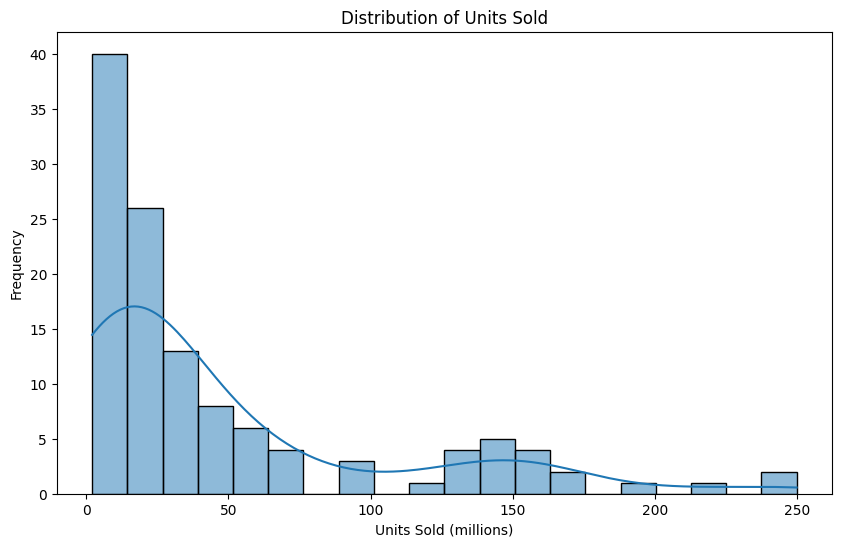

In [37]:
# Histogram for Units Sold
plt.figure(figsize=(10, 6))
sns.histplot(df['Units Sold (million )'], kde=True, bins=20)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold (millions)')
plt.ylabel('Frequency')
plt.show()

In [38]:
df.head(1)

,Rank,Manufacturer,Model,Form Factor,Smartphone?,Year,Units Sold (million )
0,1,Nokia,1100,Bar,False,2003,250.0


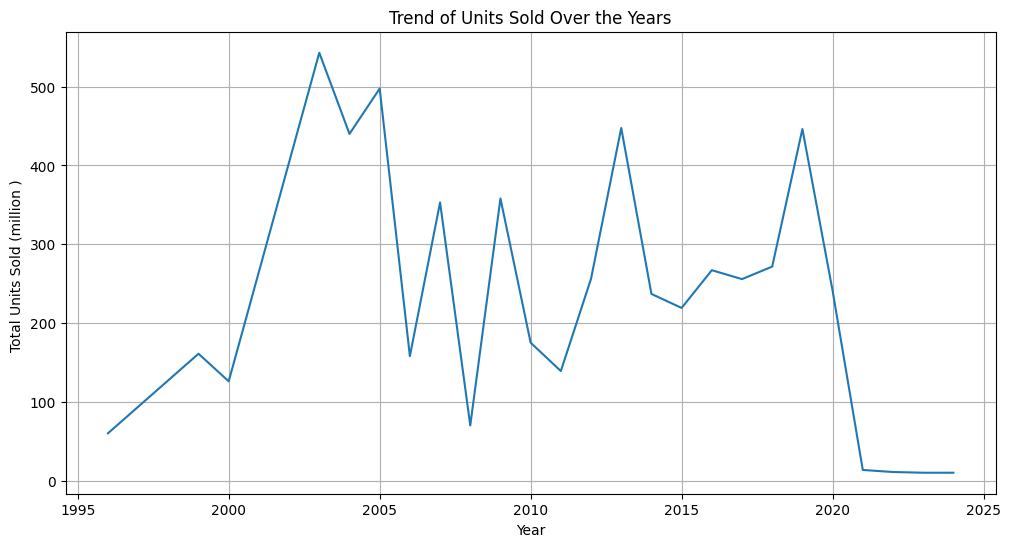

In [40]:
# Line chart for trend of Units Sold over the years
# Assuming 'Year' is a column in the DataFrame

if 'Year' in df.columns:
  # Corrected column name with space
  df_yearly_sales = df.groupby('Year')['Units Sold (million )'].sum().reset_index()
  plt.figure(figsize=(12, 6))
  # Use the correct column name for the y-axis
  sns.lineplot(data=df_yearly_sales, x='Year', y='Units Sold (million )')
  plt.title('Trend of Units Sold Over the Years')
  plt.xlabel('Year')
  # Corrected y-axis label to match the column name
  plt.ylabel('Total Units Sold (million ) ')
  plt.grid(True)
  plt.show()
else:
  print("DataFrame does not contain a 'Year' column to plot the trend.")

**Task 2: Statiscal Analysis**

In [41]:
from scipy.stats import ttest_ind

In [44]:
# For this example, let's assume we need to create a simple proxy
# A more robust solution would involve a more accurate way to classify
if 'Smartphone' not in df.columns:
  # This is a placeholder and likely not accurate for all models
  df['Smartphone'] = df['Model'].apply(lambda x: 'Smartphone' if 'iPhone' in x or 'Galaxy' in x else 'Non-Smartphone')

smartphone_sales = df[df['Smartphone'] == 'Smartphone']['Units Sold (million )']
nonsmartphone_sales = df[df['Smartphone'] == 'Non-Smartphone']['Units Sold (million )']


In [45]:
# Perform independent samples t-test
ttest_result = ttest_ind(smartphone_sales, nonsmartphone_sales, nan_policy='omit') # Handle potential NaNs

print(f"T-test results:")
print(f"  Statistic: {ttest_result.statistic:.4f}")
print(f"  P-value: {ttest_result.pvalue:.4f}")

if ttest_result.pvalue < 0.05:
  print("  There is a significant difference in units sold between smartphones and non-smartphones.")
else:
  print("  There is no significant difference in units sold between smartphones and non-smartphones.")


T-test results:
  Statistic: -0.5632
  P-value: 0.5744
  There is no significant difference in units sold between smartphones and non-smartphones.


In [46]:
# Calculate the correlation matrix
# Exclude non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

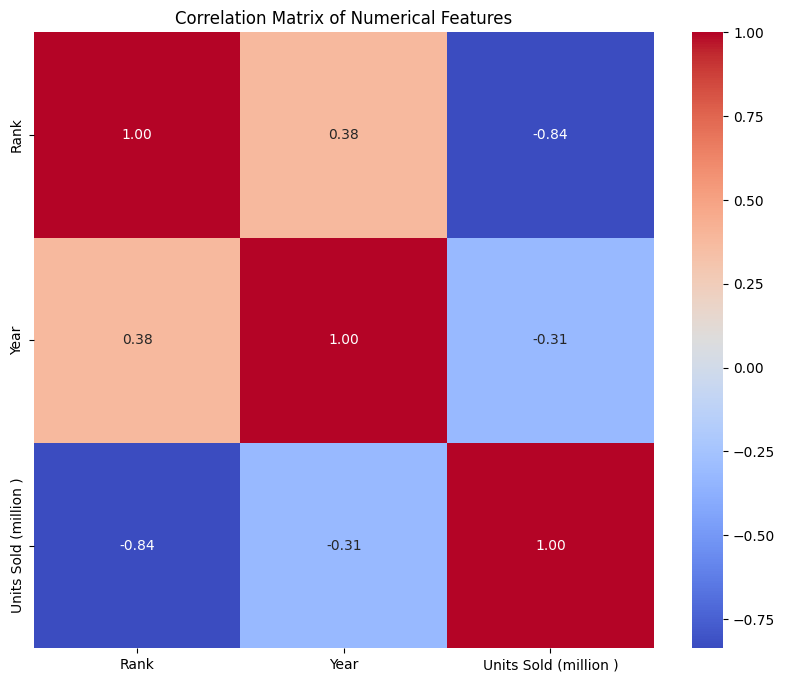

In [47]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Task 3: Data Manipulation with Pandas** **bold text**

In [48]:
# Group by manufacturer and calculate total units sold
manufacturer_sales = df.groupby('Manufacturer')['Units Sold (million )'].sum().reset_index()
print("Total units sold per manufacturer:")
print(manufacturer_sales)

Total units sold per manufacturer:
                Manufacturer  Units Sold (million )
0                      Apple                 1669.3
1                     Google                    2.1
2                        HTC                   16.0
3                     Huawei                  113.8
4                         LG                   92.0
5                       LeTV                    3.0
6                   Motorola                  323.0
7                      Nokia                 2374.5
8                       Oppo                   16.7
9                       Palm                    2.0
10  Research in Motion (RIM)                   15.0
11                   Samsung                  994.5
12             Sony Ericsson                   45.0
13                    Xiaomi                   99.1


In [49]:
# Identify the top 5 manufacturers
top_manufacturers = manufacturer_sales.sort_values(by='Units Sold (million )', ascending=False).head(5)
print("\nTop 5 manufacturers by total units sold:")
print(top_manufacturers)


Top 5 manufacturers by total units sold:
   Manufacturer  Units Sold (million )
7         Nokia                 2374.5
0         Apple                 1669.3
11      Samsung                  994.5
6      Motorola                  323.0
3        Huawei                  113.8


In [50]:
# Create a pivot table for total units sold per year for each manufacturer
# Assuming 'Year' is a column in the DataFrame
if 'Year' in df.columns:
  pivot_table_sales = pd.pivot_table(df, values='Units Sold (million )', index='Manufacturer', columns='Year', aggfunc='sum')
  print("\nPivot table of total units sold per year for each manufacturer:")
  print(pivot_table_sales)
else:
  print("\nDataFrame does not contain a 'Year' column to create the pivot table.")


Pivot table of total units sold per year for each manufacturer:
Year                      1996   1999   2000   2003   2004   2005  2006  \
Manufacturer                                                              
Apple                      NaN    NaN    NaN    NaN    NaN    NaN   NaN   
Google                     NaN    NaN    NaN    NaN    NaN    NaN   NaN   
HTC                        NaN    NaN    NaN    NaN    NaN    NaN   NaN   
Huawei                     NaN    NaN    NaN    NaN    NaN    NaN   NaN   
LG                         NaN    NaN    NaN    NaN    NaN    NaN  21.0   
LeTV                       NaN    NaN    NaN    NaN    NaN    NaN   NaN   
Motorola                  60.0    NaN    NaN   60.0  130.0   60.0   NaN   
Nokia                      NaN  161.0  126.0  473.0  295.0  422.5  77.0   
Oppo                       NaN    NaN    NaN    NaN    NaN    NaN   NaN   
Palm                       NaN    NaN    NaN    NaN    NaN    NaN   NaN   
Research in Motion (RIM)   NaN    N

**Task 4: Data Visualization with Matplotlib and Seaborn**

<ipython-input-51-b6c78b36c167>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_models, x='Units Sold (million )', y='Model', palette='viridis')


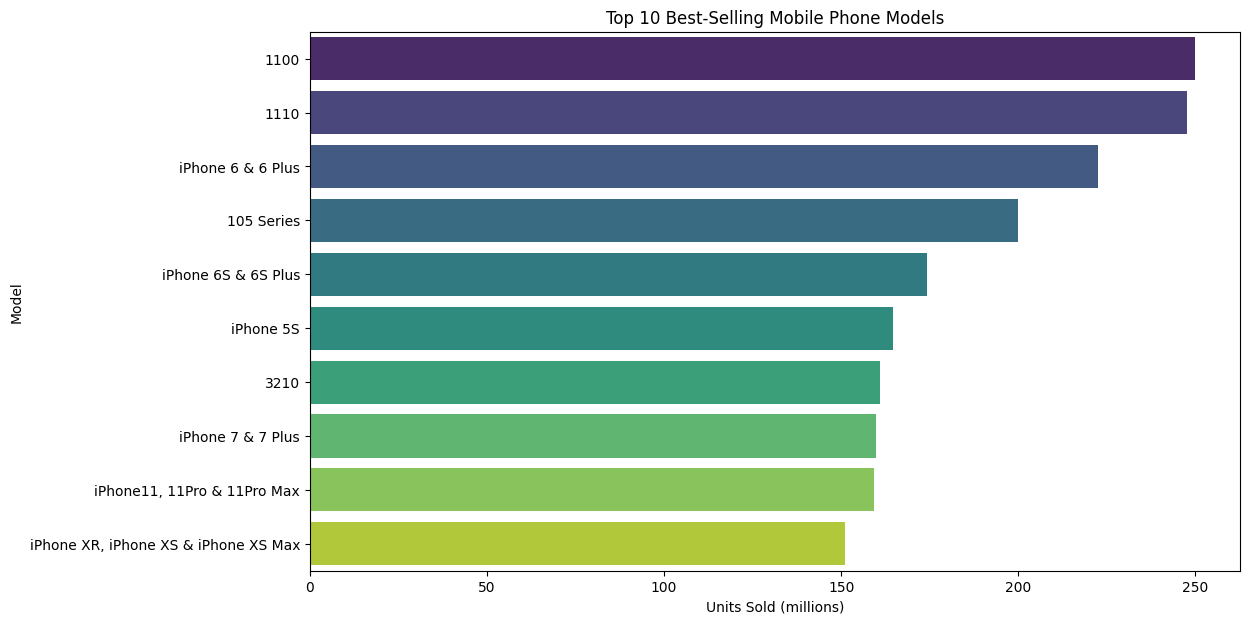

In [51]:
# Create a bar chart showing the top 10 best-selling mobile phone models.
top_10_models = df.sort_values(by='Units Sold (million )', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_models, x='Units Sold (million )', y='Model', palette='viridis')
plt.title('Top 10 Best-Selling Mobile Phone Models')
plt.xlabel('Units Sold (millions)')
plt.ylabel('Model')
plt.show()

<ipython-input-52-fa1fe484aed5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Smartphone', y='Units Sold (million )', palette='coolwarm')


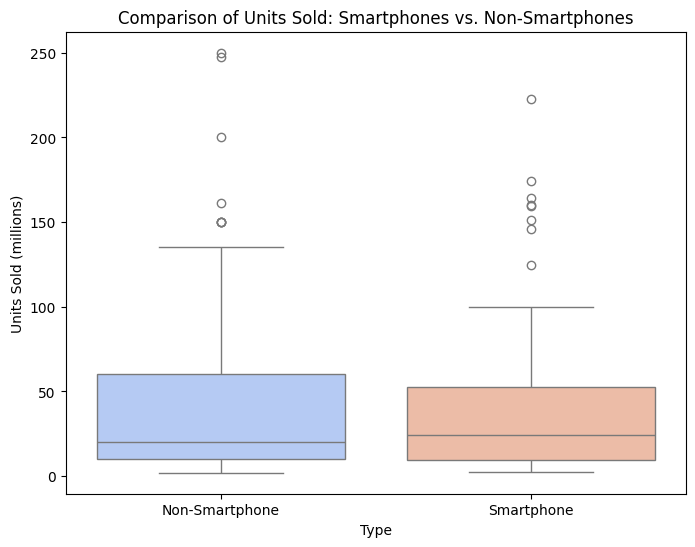

In [52]:
# Use a box plot to compare the units sold for smartphones vs. non-smartphones.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Smartphone', y='Units Sold (million )', palette='coolwarm')
plt.title('Comparison of Units Sold: Smartphones vs. Non-Smartphones')
plt.xlabel('Type')
plt.ylabel('Units Sold (millions)')
plt.show()

**Task 5: Machine Learning**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
X = df[['Year']]  # Feature (independent variable)
y = df['Units Sold (million )']  # Target (dependent variable)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Build the Linear Regression model
model = LinearRegression()

In [57]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Make predictions
y_pred = model.predict(X_test)

In [60]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Simple Linear Regression Model Performance:")
print(f"  R-squared: {r2:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")

Simple Linear Regression Model Performance:
  R-squared: 0.1617
  Mean Squared Error (MSE): 3460.2429


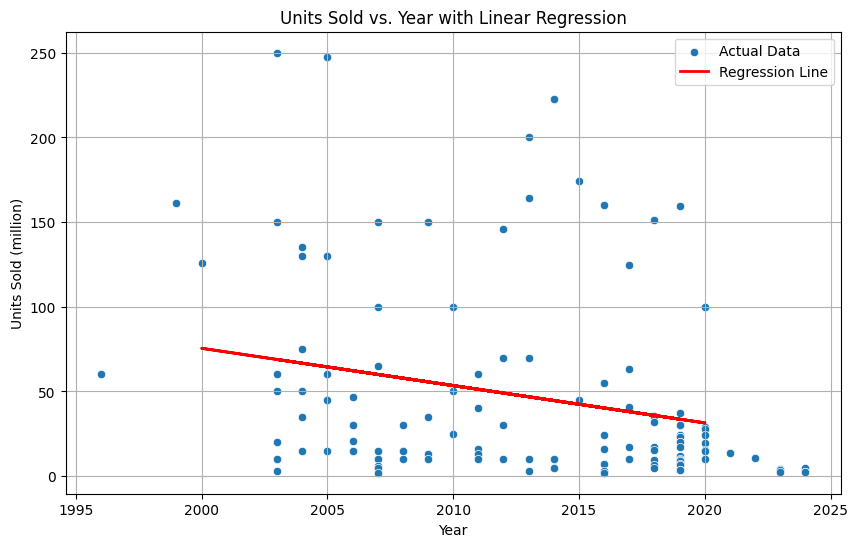

In [62]:
# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Year'], y=y, label='Actual Data')
plt.plot(X_test['Year'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Units Sold vs. Year with Linear Regression')
plt.xlabel('Year')
plt.ylabel('Units Sold (million)')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
print(f"\nModel coefficients:")
print(f"  Intercept: {model.intercept_:.4f}")
print(f"  Coefficient for Year: {model.coef_[0]:.4f}")


Model coefficients:
  Intercept: 4482.0327
  Coefficient for Year: -2.2033
